In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2023-02-14 16:24:35.239920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 16:24:37.836177: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prp/anaconda3/lib/
2023-02-14 16:24:37.836267: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prp/anaconda3/lib/
2023-02-14 16:24:37.836274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.c

In [2]:
tf.config.list_physical_devices('GPU')

2023-02-14 16:24:40.030896: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-14 16:24:40.114725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-14 16:24:40.114775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = pd.read_csv("/mnt/c/Users/Admin/Downloads/citrus.csv")
data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [5]:
data.name.value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [6]:
train_size = int(len(data) * 0.8)
train_size

8000

In [7]:
dataset = data.sample(frac = 1)

In [8]:
dataset.head()

,name,diameter,weight,red,green,blue
4220,orange,9.72,172.15,155,78,23
5078,grapefruit,8.93,155.54,154,66,15
5054,grapefruit,8.81,153.01,154,59,6
2690,orange,8.60,154.21,159,81,2
7173,grapefruit,11.25,194.39,143,66,8


In [24]:
from sklearn.model_selection import train_test_split
labels = dataset['name']
data = dataset.drop('name', axis=1)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, shuffle=True)

In [25]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
onc = OneHotEncoder(sparse=True, handle_unknown='error')

In [17]:
onc.fit(train_labels.to_numpy().reshape(-1, 1))

OneHotEncoder()

TypeError: transform() missing 1 required positional argument: 'func'

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [21]:
ct = make_column_transformer(
    (MinMaxScaler(), ["diameter", "weight", "red", 'green', 'blue']), # get all values between 0 and 1
)
ct.fit(train_data)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['diameter', 'weight', 'red', 'green',
                                  'blue'])])

In [22]:
train_data_normalised = ct.transform(train_data)
test_data_normalised = ct.transform(test_data)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
le.fit(train_labels)

LabelEncoder()

In [27]:
train_labels_encoded = le.transform(train_labels)
test_labels_encoded = le.transform(test_labels)

In [28]:
train_labels_encoded

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
test_labels_encoded

array([1, 0, 0, ..., 1, 0, 0])

In [30]:
train_data_normalised.shape, test_data_normalised.shape

((8000, 5), (2000, 5))

In [31]:
test_data_normalised

array([[0.46404744, 0.42500715, 0.58108108, 0.41558442, 0.2826087 ],
       [0.51297257, 0.4909299 , 0.64864865, 0.45454545, 0.04347826],
       [0.2698295 , 0.21756795, 0.36486486, 0.57142857, 0.        ],
       ...,
       [0.41808747, 0.38592275, 0.51351351, 0.58441558, 0.        ],
       [0.39659007, 0.36091559, 0.62162162, 0.32467532, 0.17391304],
       [0.67828021, 0.68915594, 0.63513514, 0.45454545, 0.        ]])

In [33]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(train_data_normalised, train_labels_encoded, epochs=200, validation_data = (test_data_normalised,test_labels_encoded ))

Epoch 1/200


2023-02-14 16:55:14.090355: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1dc141a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-14 16:55:14.090399: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-02-14 16:55:14.143521: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-14 16:55:14.506157: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-14 16:55:14.623537: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 [==============================] - 4s 5ms/step - loss: 0.6947 - accuracy: 0.5099 - val_loss: 0.6945 - val_accuracy: 0.4790
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.5013 - val_loss: 0.6942 - val_accuracy: 0.4810
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.5054 - val_loss: 0.6993 - val_accuracy: 0.4810
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6943 - accuracy: 0.4949 - val_loss: 0.6928 - val_accuracy: 0.5190
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.5079 - val_loss: 0.6937 - val_accuracy: 0.4855
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.4990 - val_loss: 0.6939 - val_accuracy: 0.5190
Epoch 7/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.4920 - val_loss: 0.6958 - val_accuracy: 0.4790
Epoch 8/200

250/250 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6947 - val_accuracy: 0.4820
Epoch 59/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5096 - val_loss: 0.6946 - val_accuracy: 0.4825
Epoch 60/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5067 - val_loss: 0.6940 - val_accuracy: 0.4815
Epoch 61/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5059 - val_loss: 0.6944 - val_accuracy: 0.4915
Epoch 62/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5048 - val_loss: 0.6943 - val_accuracy: 0.4875
Epoch 63/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5092 - val_loss: 0.6943 - val_accuracy: 0.4875
Epoch 64/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5034 - val_loss: 0.6946 - val_accuracy: 0.4870
Epoch

Epoch 115/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5088 - val_loss: 0.6945 - val_accuracy: 0.4865
Epoch 116/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5129 - val_loss: 0.6953 - val_accuracy: 0.4830
Epoch 117/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5081 - val_loss: 0.6952 - val_accuracy: 0.4855
Epoch 118/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5107 - val_loss: 0.6941 - val_accuracy: 0.4800
Epoch 119/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5067 - val_loss: 0.6944 - val_accuracy: 0.4885
Epoch 120/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5027 - val_loss: 0.6944 - val_accuracy: 0.4865
Epoch 121/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5044 - val_loss: 0.6941 - val_ac

250/250 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5067 - val_loss: 0.6946 - val_accuracy: 0.4860
Epoch 172/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5114 - val_loss: 0.6947 - val_accuracy: 0.4865
Epoch 173/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6943 - val_accuracy: 0.4845
Epoch 174/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5045 - val_loss: 0.6947 - val_accuracy: 0.4885
Epoch 175/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5111 - val_loss: 0.6944 - val_accuracy: 0.4835
Epoch 176/200
250/250 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5090 - val_loss: 0.6950 - val_accuracy: 0.4935
Epoch 177/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5048 - val_loss: 0.6937 - val_accuracy: 0.4825

In [34]:
new_data = pd.read_csv("/mnt/c/Users/Admin/Downloads/citrus.csv")
new_data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [35]:
x = new_data.drop('name', axis=1)
y = new_data['name']

In [36]:
x

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [44]:
y = new_data['name'].map({'orange': 1, 'grapefruit': 0})

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [47]:
from sklearn.preprocessing import MinMaxScaler
mnscaler = MinMaxScaler()

In [48]:
X_train_normalised = mnscaler.fit_transform(X_train)
X_test_normalised = mnscaler.transform(X_test)

In [49]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1 = model_1.fit(X_train_normalised, y_train, epochs=200, validation_data = (X_test_normalised , y_test))

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 0.3206 - accuracy: 0.8951 - val_loss: 0.1869 - val_accuracy: 0.9265
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1829 - accuracy: 0.9268 - val_loss: 0.1759 - val_accuracy: 0.9305
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1808 - accuracy: 0.9258 - val_loss: 0.1783 - val_accuracy: 0.9310
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1826 - accuracy: 0.9244 - val_loss: 0.1767 - val_accuracy: 0.9280
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1812 - accuracy: 0.9262 - val_loss: 0.1737 - val_accuracy: 0.9300
Epoch 6/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1800 - accuracy: 0.9271 - val_loss: 0.1736 - val_accuracy: 0.9295
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1795 - accuracy: 0.9264 - val_loss: 0.1731 - val_accuracy: 0.9320

Epoch 58/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1695 - accuracy: 0.9315 - val_loss: 0.1644 - val_accuracy: 0.9345
Epoch 59/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1695 - accuracy: 0.9299 - val_loss: 0.1648 - val_accuracy: 0.9355
Epoch 60/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1704 - accuracy: 0.9321 - val_loss: 0.1643 - val_accuracy: 0.9350
Epoch 61/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1688 - accuracy: 0.9310 - val_loss: 0.1843 - val_accuracy: 0.9290
Epoch 62/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1697 - accuracy: 0.9312 - val_loss: 0.1640 - val_accuracy: 0.9360
Epoch 63/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1682 - accuracy: 0.9308 - val_loss: 0.1624 - val_accuracy: 0.9360
Epoch 64/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1679 - accuracy: 0.9330 - val_loss: 0.1731 - val_accuracy:

Epoch 115/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1335 - accuracy: 0.9528 - val_loss: 0.1493 - val_accuracy: 0.9505
Epoch 116/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1345 - accuracy: 0.9517 - val_loss: 0.1284 - val_accuracy: 0.9500
Epoch 117/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1346 - accuracy: 0.9519 - val_loss: 0.1295 - val_accuracy: 0.9475
Epoch 118/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1307 - accuracy: 0.9536 - val_loss: 0.1493 - val_accuracy: 0.9525
Epoch 119/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1359 - accuracy: 0.9529 - val_loss: 0.1432 - val_accuracy: 0.9545
Epoch 120/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1357 - accuracy: 0.9531 - val_loss: 0.1268 - val_accuracy: 0.9495
Epoch 121/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1294 - accuracy: 0.9536 - val_loss: 0.1419 - val_ac

250/250 [==============================] - 1s 3ms/step - loss: 0.1303 - accuracy: 0.9541 - val_loss: 0.1243 - val_accuracy: 0.9505
Epoch 172/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1425 - accuracy: 0.9498 - val_loss: 0.1255 - val_accuracy: 0.9505
Epoch 173/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1294 - accuracy: 0.9575 - val_loss: 0.1244 - val_accuracy: 0.9520
Epoch 174/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1309 - accuracy: 0.9553 - val_loss: 0.1306 - val_accuracy: 0.9510
Epoch 175/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1288 - accuracy: 0.9556 - val_loss: 0.1338 - val_accuracy: 0.9535
Epoch 176/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.9539 - val_loss: 0.1351 - val_accuracy: 0.9435
Epoch 177/200
250/250 [==============================] - 1s 4ms/step - loss: 0.1333 - accuracy: 0.9529 - val_loss: 0.1294 - val_accuracy: 0.9455

In [50]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

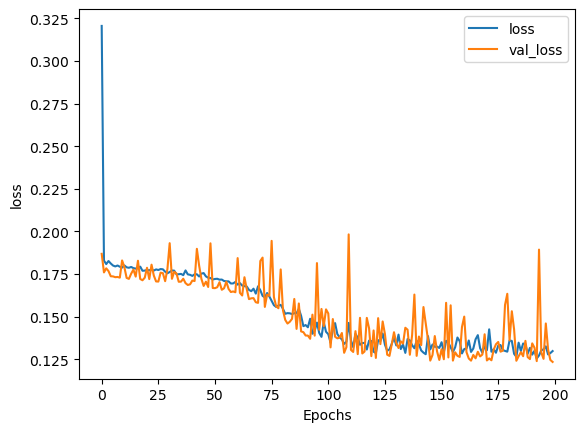

In [51]:
plot_graphs(history_1, 'loss')

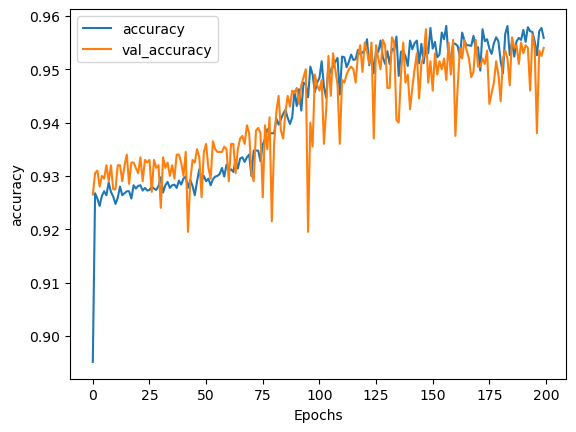

In [52]:
plot_graphs(history_1, 'accuracy')

In [53]:
model_1.evaluate(X_test_normalised, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.1234 - accuracy: 0.9540


[0.12342240661382675, 0.9539999961853027]

In [54]:
def get_callbacks(model_name):
  callbacks = []
  MC = tf.keras.callbacks.ModelCheckpoint(f'saved_models/{model_name}', monitor='val_loss', save_best_only='True', verbose=1)
  ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights='True')
  return [MC, ES]

In [56]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
], name="orangevsgrapefruit_model_2")

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_2 = model_2.fit(X_train_normalised, y_train, epochs=200, validation_data = (X_test_normalised , y_test), callbacks = get_callbacks(model_2.name))

Epoch 1/200
240/250 [===========================>..] - ETA: 0s - loss: 0.3941 - accuracy: 0.9148
Epoch 1: val_loss improved from inf to 0.20146, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'

INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 2s 6ms/step - loss: 0.3872 - accuracy: 0.9147 - val_loss: 0.2015 - val_accuracy: 0.9240
Epoch 2/200
250/250 [==============================] - ETA: 0s - loss: 0.1882 - accuracy: 0.9254
Epoch 2: val_loss improved from 0.20146 to 0.17781, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 1s 5ms/step - loss: 0.1882 - accuracy: 0.9254 - val_loss: 0.1778 - val_accuracy: 0.9315
Epoch 3/200
247/250 [============================>.] - ETA: 0s - loss: 0.1821 - accuracy: 0.9259
Epoch 3: val_loss did not improve from 0.17781
250/250 [==============================] - 1s 4ms/step - loss: 0.1816 - accuracy: 0.9261 - val_loss: 0.1787 - val_accuracy: 0.9305
Epoch 4/200
243/250 [============================>.] - ETA: 0s - loss: 0.1822 - accuracy: 0.9252
Epoch 4: val_loss improved from 0.17781 to 0.17742, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 1s 5ms/step - loss: 0.1831 - accuracy: 0.9246 - val_loss: 0.1774 - val_accuracy: 0.9290
Epoch 5/200
247/250 [============================>.] - ETA: 0s - loss: 0.1819 - accuracy: 0.9255
Epoch 5: val_loss improved from 0.17742 to 0.17465, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 1s 5ms/step - loss: 0.1814 - accuracy: 0.9258 - val_loss: 0.1747 - val_accuracy: 0.9305
Epoch 6/200
248/250 [============================>.] - ETA: 0s - loss: 0.1798 - accuracy: 0.9267
Epoch 6: val_loss improved from 0.17465 to 0.17463, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 2s 6ms/step - loss: 0.1804 - accuracy: 0.9262 - val_loss: 0.1746 - val_accuracy: 0.9305
Epoch 7/200
248/250 [============================>.] - ETA: 0s - loss: 0.1787 - accuracy: 0.9263
Epoch 7: val_loss improved from 0.17463 to 0.17437, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 1s 5ms/step - loss: 0.1800 - accuracy: 0.9260 - val_loss: 0.1744 - val_accuracy: 0.9310
Epoch 8/200
241/250 [===========================>..] - ETA: 0s - loss: 0.1800 - accuracy: 0.9287
Epoch 8: val_loss did not improve from 0.17437
250/250 [==============================] - 1s 4ms/step - loss: 0.1805 - accuracy: 0.9285 - val_loss: 0.1745 - val_accuracy: 0.9300
Epoch 9/200
245/250 [============================>.] - ETA: 0s - loss: 0.1804 - accuracy: 0.9265
Epoch 9: val_loss improved from 0.17437 to 0.17429, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 1s 5ms/step - loss: 0.1800 - accuracy: 0.9266 - val_loss: 0.1743 - val_accuracy: 0.9320
Epoch 10/200
245/250 [============================>.] - ETA: 0s - loss: 0.1803 - accuracy: 0.9258
Epoch 10: val_loss did not improve from 0.17429
250/250 [==============================] - 1s 4ms/step - loss: 0.1795 - accuracy: 0.9260 - val_loss: 0.1845 - val_accuracy: 0.9280
Epoch 11/200
240/250 [===========================>..] - ETA: 0s - loss: 0.1795 - accuracy: 0.9257
Epoch 11: val_loss did not improve from 0.17429
250/250 [==============================] - 1s 3ms/step - loss: 0.1809 - accuracy: 0.9250 - val_loss: 0.1797 - val_accuracy: 0.9275
Epoch 12/200
245/250 [============================>.] - ETA: 0s - loss: 0.1794 - accuracy: 0.9265
Epoch 12: val_loss improved from 0.17429 to 0.17352, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 1s 5ms/step - loss: 0.1801 - accuracy: 0.9261 - val_loss: 0.1735 - val_accuracy: 0.9305
Epoch 13/200
245/250 [============================>.] - ETA: 0s - loss: 0.1798 - accuracy: 0.9272
Epoch 13: val_loss improved from 0.17352 to 0.17333, saving model to saved_models/orangevsgrapefruit_model_2
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1102b0>, 139992245709040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c126790>, 139992245709120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0b9700>, 139992245764304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f528c054cd0>, 139992245764384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c1d9f70>, 139992245766224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f527c0d40d0>, 139992245766304), {}).


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


INFO:tensorflow:Assets written to: saved_models/orangevsgrapefruit_model_2/assets


250/250 [==============================] - 1s 5ms/step - loss: 0.1796 - accuracy: 0.9273 - val_loss: 0.1733 - val_accuracy: 0.9305
Epoch 14/200
238/250 [===========================>..] - ETA: 0s - loss: 0.1800 - accuracy: 0.9261
Epoch 14: val_loss did not improve from 0.17333
250/250 [==============================] - 1s 4ms/step - loss: 0.1800 - accuracy: 0.9264 - val_loss: 0.1754 - val_accuracy: 0.9300
Epoch 15/200
243/250 [============================>.] - ETA: 0s - loss: 0.1793 - accuracy: 0.9272
Epoch 15: val_loss did not improve from 0.17333
250/250 [==============================] - 1s 4ms/step - loss: 0.1795 - accuracy: 0.9273 - val_loss: 0.1801 - val_accuracy: 0.9295
Epoch 16/200
242/250 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9259
Epoch 16: val_loss did not improve from 0.17333
250/250 [==============================] - 1s 4ms/step - loss: 0.1793 - accuracy: 0.9270 - val_loss: 0.1743 - val_accuracy: 0.9340
Epoch 17/200
240/250 [================

In [57]:
model_2.evaluate(X_test_normalised, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.1733 - accuracy: 0.9305


[0.17333020269870758, 0.9304999709129333]

In [58]:
model_2 = tf.keras.models.load_model("saved_models/orangevsgrapefruit_model_2")